In [1]:
from sklearn import svm,datasets
import numpy as np
from custom_svc import *
import os,sys
from graph import *
from ts import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ot_distances import Wasserstein_distance as EMD
from ot_distances import Gromov_Wasserstein_distance as WGW
from custom_gridsearch import GridSearch
from sklearn.base import clone
from copy import deepcopy
from tslearn.datasets import CachedDatasets,UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.svm import TimeSeriesSVC



In [18]:
np.random.seed(0)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)



In [ ]:
clf = TimeSeriesSVC(kernel="gak", gamma=.1, sz=X_train.shape[1], d=X_train.shape[2])
clf.fit(X_train, y_train)
print("Correct classification rate:", clf.score(X_test, y_test))

In [6]:
path='./data/UCR_TS_Archive_2015/Trace/'
train=create_ts(path,t='TRAIN')
test=create_ts(path,t='TEST')
x_train,y_train=zip(*train)
x_test,y_test=zip(*test)
graph_svc=TS_WGW_SVC_Classifier(epsilon=4.6,alpha=0.7,C=178,gamma=0.8,verbose=False,method='sqeuclidean',normalize_distance=True,features_metric='sqeuclidean')


In [7]:
start=time.time()
graph_svc.compute_similarity(x_train[0],x_train[1])
end=time.time()
print('TIME : ',end-start)

TIME :  0.1295781135559082


In [8]:
start=time.time()
graph_svc.fit(np.array(x_train).reshape(-1,1),np.array(y_train))
end=time.time()
print('TIME : ',end-start)

TIME :  118.58446383476257


In [11]:
preds=graph_svc.predict(np.array(x_test).reshape(-1,1))

TOUTES LES DISTANCES ONT ETE CHERCHEES 
TOUTES LES DISTANCES ONT ETE RECALCULEES 


In [13]:
error=np.sum(preds == y_test) / len(y_test)

In [14]:
error

0.0

In [16]:
np.array(y_test)

array([3, 1, 3, 2, 1, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 4, 2, 3, 1, 1, 3, 4, 4,
       1, 2, 3, 3, 4, 3, 4, 3, 2, 2, 2, 1, 4, 3, 1, 2, 4, 3, 4, 2, 2, 4, 2,
       1, 4, 4, 3, 2, 4, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 4, 1, 2, 1, 2,
       1, 1, 2, 3, 4, 1, 2, 2, 4, 3, 2, 2, 1, 4, 1, 2, 2, 4, 1, 1, 1, 3, 1,
       1, 2, 3, 3, 2, 2, 3, 4])

In [17]:
preds

array([1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1])

In [26]:
ts=x_train[4]

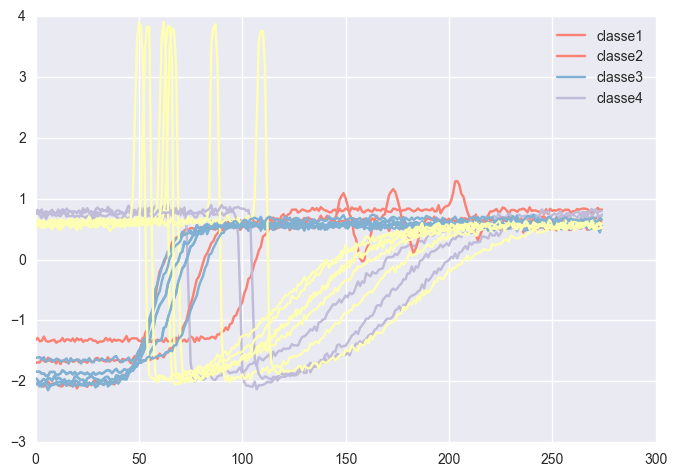

In [31]:
ts.plot_sample_ts_dataset(train,N=20)

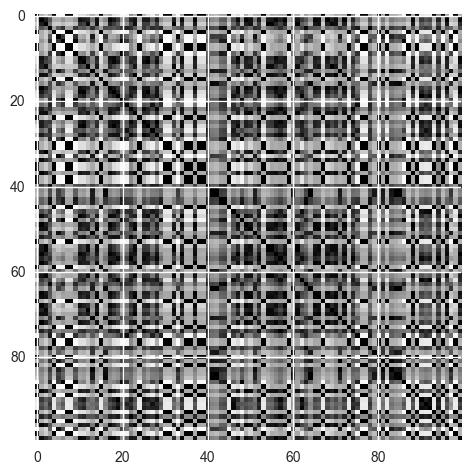

In [10]:
plt.imshow(graph_svc.D,interpolation='nearest')
plt.show()

In [1]:
from sklearn import svm,datasets
import numpy as np
from custom_svc import *
import os,sys
from graph import *
from ts import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ot_distances import Wasserstein_distance as EMD
from ot_distances import Gromov_Wasserstein_distance as WGW
from custom_gridsearch import GridSearch
from sklearn.base import clone
from copy import deepcopy
from tslearn.datasets import CachedDatasets,UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.svm import TimeSeriesSVC



path='./data/UCR_TS_Archive_2015/Trace/'
train=create_ts(path,t='TRAIN')
test=create_ts(path,t='TEST')
x_train,y_train=zip(*train)
x_test,y_test=zip(*test)

x_train=x_train[1:15]
x_test=x_test[1:15]
y_train=y_train[1:15]
y_test=y_test[1:15]

n_splits=5
n_jobs=1

tuned_parameters = [{'epsilon':list([0.5]),
                    'alpha':list([0.8])
                     ,'method':['sqeuclidean']
                     ,'normalize_distance':[True]
                     ,'features_metric':['sqeuclidean']
                     ,'scale':[False,True]
                     ,'C':[10**k for k in [0,0.5,1,1.7,1.8,2,2.1,2.2,2.3,2.22,2.23,2.24,2.25,2.26,2.28,2.29,2.3,2.32,2.33,2.34,2.35,2.36,2.4]]
                     ,'gamma':[2**k for k in [-3,-2,-1,-1.2,-1.1,-1.3,-1.4,-0.1,-0.2,-0.3,-0.4,0,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.2,0.3,0.4,0.5,0.6,1,2,3]]}]



graph_svc=TS_WGW_SVC_Classifier()
clf = GridSearch(graph_svc, tuned_parameters=tuned_parameters,nb_splits=n_splits,n_jobs=n_jobs,parallel=False,csv='result_'+'.csv')
clf.fit(np.array(x_train).reshape(-1,1),np.array(y_train))


preds=clf.test_best_estimator(np.array(x_train).reshape(-1,1),np.array(y_train),np.array(x_test).reshape(-1,1),np.array(y_test))

CHANGE PARAMETERS : RAZ similarities_dict


//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CHANGE PARAMETERS : RAZ similarities_dict
TOUTES LES DISTANCES ONT ETE CHERCHEES 
TOUTES LES DISTANCES ONT ETE RECALCULEES 
